In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from wisecoop import Cooperante

iris = datasets.load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.5)
model = LogisticRegression()
model.fit(X_train, y_train)

# make prediction (None, class_num)
y_pred_proba = model.predict_proba(X_test)

# make penalty array
penalty_array = np.array([[0, 1, 3],
                         [1, 0, 1],
                         [5, 1, 0]])

,score over X %,accuracy_score(label0),accuracy_score(label1)
0,90,0,0
1,95,0,0
2,99,10,10


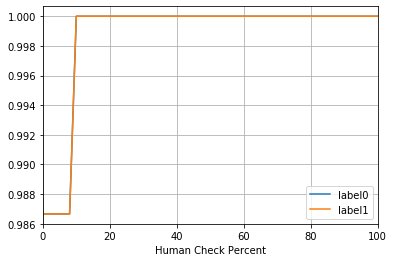

In [3]:
coop = Cooperante(penalty_array)

# coop_pred:(None,)
# expected_rink:(None,)
coop_pred, expected_risk = coop.fit(y_pred_proba)

# Visualize
coop.plot_eval(y_test, metrics='accuracy_score', class_ref = [0,1], sampling_rate=2)

#90, 95, 99% value
coop.check_rate_df

In [2]:
prob = np.load("test.npy")
label = np.load("answer.npy")

In [3]:
label


array([1., 0., 0., ..., 0., 1., 0.])

In [8]:
penalty_array = np.array([[0,1],[1, 0]])
coop = Cooperante(penalty_array, class_to_check=[1])

# coop_pred:(None,)
# expected_rink:(None,)
coop_pred, expected_risk = coop.fit(prob)

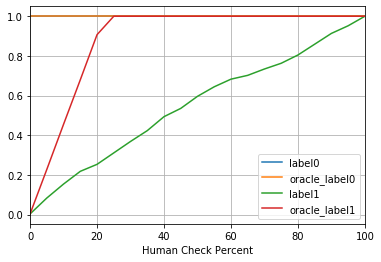

In [9]:
# Visualize
coop.plot_eval(label, metrics='recall_score', class_ref = [1,0], show_oracle=True)